###### Name    :	Syed Karar Hussain Shahsain Shah
###### Roll No :	PIAIC145366
###### Email	 :    karar.shah2015@gmail.com
###### Course :    AI
###### Session:    No.1 (Respect Sir Nasir Hussain)(Saturday)

# Car Price Prediction::
Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction
# Problem Statement::
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
# WORKFLOW ::
1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

### Importing and inspecting data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading dataset
d = pd.read_csv('CarPrice_Assignment.csv')

#customizing output of DataFrame
pd.set_option('display.max_columns', 300)  # or 1000
pd.set_option('display.max_rows', 300)  # or 1000


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#Finding total number of NULL/Nan values in each column
d.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

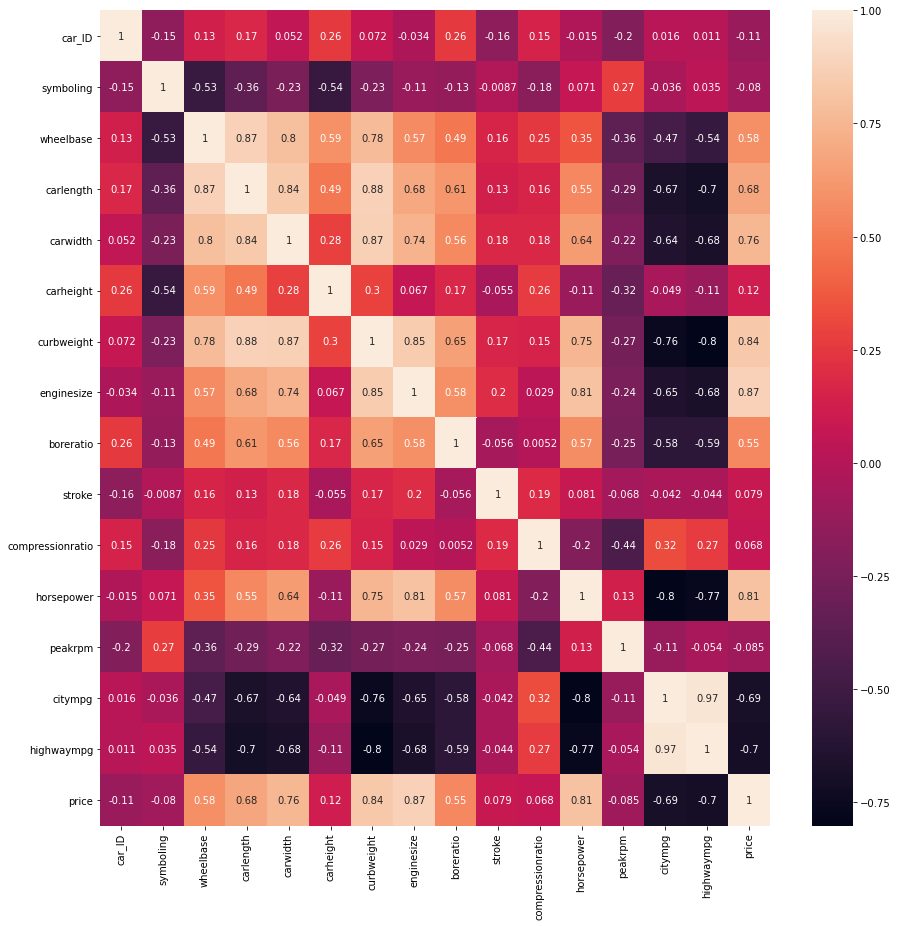

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluating Corelation b/w columns of dataset
c = d.corr()

#Ploating results on a headmap
plt.figure(figsize =(15,15))
g = sns.heatmap(c,annot=True)

In [6]:
d.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Filtering, spliting and one-hot encoding

In [7]:
#Droping/Deleting columns having less/negative relation with 'PRICE' column
d.drop(['car_ID','carheight','stroke','compressionratio','peakrpm','citympg','highwaympg'],axis=1,inplace=True)

In [8]:
#One-hot encoding of columns having dtype 'OBJECT'
d1 = pd.get_dummies(d, columns=d.select_dtypes(include=['object']).columns)

#View of (dtype 'object') columns
d.select_dtypes(include=['object']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [9]:
#Seprating price from dataset as it is target/output for our DL model
lables = d1.pop('price')

In [10]:
d1.head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cyli

In [11]:
lables.head(),type(lables)

(0    13495.0
 1    16500.0
 2    16500.0
 3    13950.0
 4    17450.0
 Name: price, dtype: float64,
 pandas.core.series.Series)

In [12]:
#Using 'sklearn' to split dataset randomly into 'train' and 'test' datasets
from sklearn.model_selection import train_test_split

#Training set(input & output) =70% AND Testing set(I/O data) =30%
train_x , test_x, train_y , test_y = train_test_split(d1.copy(),lables.copy(),
                                                      train_size = 0.70, random_state=444)

### Normalizing data

In [13]:
#Code to sellect columns contaning 'integrate/float' values
train_x.select_dtypes(include=['int64','float64']).head()

,symboling,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
81,3,96.3,173.0,65.4,2328,122,3.35,88
16,0,103.5,193.8,67.9,3380,209,3.62,182
165,1,94.5,168.7,64.0,2265,98,3.24,112
49,0,102.0,191.7,70.6,3950,326,3.54,262
57,3,95.3,169.0,65.7,2385,70,3.33,101


In [14]:
#Storing mean and standard deviation of slected columns in respective variables
mean_x = train_x.select_dtypes(include=['int64','float64']).mean(axis=0)
std_x  = train_x.select_dtypes(include=['int64','float64']).std(axis=0)

In [15]:
#Subtracting & dividing mean & standard deviation respectively from all entries of columns
#every column has seprate mean and std #BUT every value in column gets (-)&(÷) from mean and std of specific column

In [16]:
#Normalizing int/fload values around 0(zero) in 'train dataset (input)'
train_x.loc[:,train_x.select_dtypes(include=['int64','float64']).columns] -=mean_x
train_x.loc[:,train_x.select_dtypes(include=['int64','float64']).columns] /=std_x

In [17]:
#Normalizing int/fload values around 0(zero) in 'test dataset(input)'
test_x.loc[:,test_x.select_dtypes(include=['int64','float64']).columns] -=mean_x
test_x.loc[:,test_x.select_dtypes(include=['int64','float64']).columns] /=std_x

In [18]:
#Normalizing int/fload values around 0(zero) in 'test & test dataset(output)'
m = train_y.mean(axis=0)
d = train_y.std(axis=0)
train_y -= m
train_y /= d

train_x_f = train_x.copy()
train_y_f = train_y.copy()

In [19]:
train_y_f.shape

(143,)

### spliting again for train and validation sets

In [20]:
#Spliting dataset
#Training set(input & output) =50% AND Validation set(I/O data) =20%
train_x1, val_x, train_y, val_y = train_test_split(train_x.copy(), train_y.copy(), train_size=0.73, random_state=444)

### Converting into array

In [21]:
#Converting input and output to np Array. #Model will take input and output as array
tr_x = np.array(train_x1)
tr_y = np.array(train_y)

te_x = np.array(test_x)
te_y = np.array(test_y)

val_x = np.array(val_x)
val_y = np.array(val_y)


### Model

In [22]:
from keras import models,layers,optimizers,losses,activations,metrics,regularizers

#Defining a DL model
def simple_model(act,tds):
    model = models.Sequential()
    
    ##tds = input data
    model.add(layers.Dense(10, activation=act, input_shape=(tds.shape[1],)))
    model.add(layers.Dense(8, activation=act,))
    model.add(layers.Dense(6, activation=act,))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

In [23]:
#Defining a DL model
def simple_model_regularizer(act,tds):
    model = models.Sequential()
    
    ##tds = input data
    model.add(layers.Dense(10, activation=act, kernel_regularizer= regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(tds.shape[1],)))
    model.add(layers.Dense(8, activation=act, kernel_regularizer = regularizers.l1_l2(l1=0.01,l2=0.01)))
    model.add(layers.Dense(6, activation=act, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse',metrics=['mae'])
    return model

In [24]:
#Defining a DL model
def drop_regularizer_model(act,tds):
    model = models.Sequential()
    
    ##tds = input data
    model.add(layers.Dense(10, activation=act, kernel_regularizer= regularizers.l1_l2(l1=0.001,l2=0.001), input_shape=(tds.shape[1],)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation=act, kernel_regularizer = regularizers.l1_l2(l1=0.01,l2=0.01)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation=act, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse',metrics=['mae'])
    return model

### Calling for traning and evaluating 

## Relu

###### simple

In [25]:
#Calling model and evacuating it
model_relu = simple_model('relu',tr_x)
model_relu.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
r_l,r_e = model_relu.evaluate(val_x, val_y)

2/2 [==============================] - 0s 8ms/step - loss: 0.0595 - mae: 0.1763


###### With regularizer

In [26]:
model_relu_reg = simple_model_regularizer('relu',tr_x)
model_relu_reg.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
rg_r_l, rg_r_e = model_relu_reg.evaluate(val_x, val_y)

2/2 [==============================] - 0s 0s/step - loss: 0.1169 - mae: 0.2324


###### with drop & regularizer

In [27]:
model_relu_reg_drop = drop_regularizer_model('relu',tr_x)
model_relu_reg_drop.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
d_rg_r_l, d_rg_r_e = model_relu_reg_drop.evaluate(val_x, val_y)

2/2 [==============================] - 0s 0s/step - loss: 0.1649 - mae: 0.2289


## Tanh

###### simple


In [28]:
#Calling model and evacuating it
model_tanh = simple_model('tanh',tr_x)
model_tanh.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
t_l,t_e = model_tanh.evaluate(val_x, val_y)

2/2 [==============================] - 0s 0s/step - loss: 0.0978 - mae: 0.2250


###### With regularizer

In [29]:
model_tanh = simple_model_regularizer('tanh',tr_x)
model_tanh.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
rg_t_l, rg_t_e = model_tanh.evaluate(val_x, val_y)

2/2 [==============================] - 0s 9ms/step - loss: 0.1478 - mae: 0.2272


###### with drop & regularizer


In [30]:
model_tanh = drop_regularizer_model('tanh',tr_x)
model_tanh.fit(tr_x,tr_y, epochs=100, batch_size=1,verbose=0)
d_rg_t_l, d_rg_t_e = model_tanh.evaluate(val_x, val_y)


2/2 [==============================] - 0s 3ms/step - loss: 0.1643 - mae: 0.2424


### Results of evaluation 

In [31]:
print('Simple model with:\nrelu:  ','loss=',r_l,'mae=',r_e)
print('tanh:  ','loss=',t_l,'mae=',t_e)

print('\nmodel with reguliz:\nrelu:  ','loss=',rg_r_l,'mae=',rg_r_e)
print('tanh:  ','loss=',rg_t_l,'mae=',rg_t_e)

print('\nmodel with reguliz & dropout:\nrelu:  ','loss=',d_rg_r_l,'mae=',d_rg_r_e)
print('tanh:  ','loss=',d_rg_t_l,'mae=',d_rg_t_e)


Simple model with:
relu:   loss= 0.059469059109687805 mae= 0.1763334721326828
tanh:   loss= 0.09779279679059982 mae= 0.22501735389232635

model with reguliz:
relu:   loss= 0.11692110449075699 mae= 0.23235240578651428
tanh:   loss= 0.14783495664596558 mae= 0.22718575596809387

model with reguliz & dropout:
relu:   loss= 0.16494342684745789 mae= 0.22893013060092926
tanh:   loss= 0.16428901255130768 mae= 0.2424105405807495


### Representation of predicted and actual targets 

In [32]:
def pred_frame(pre_val):
    #DataFrame
    dd = pd.DataFrame(te_y, columns=['Target'])
    dd['Prediction']=np.round((pre_val*d)+m)
    dd['Percentage']=(dd.Prediction / dd.Target)*100
    display(dd.head())

    #Mean of %age of model accuracy with respect to actual targets
    print('Mean of %age of model accuracy with respect to actual targets= ',(dd.Percentage).mean())

In [33]:
#Compairing models prediction and actual targets
print('relu')
pred_frame(model_relu.predict(te_x))

relu


,Target,Prediction,Percentage
0,11694.0,12257.0,104.814435
1,12945.0,9039.0,69.826188
2,7395.0,7790.0,105.341447
3,13495.0,16720.0,123.897740
4,12964.0,16426.0,126.704721


Mean of %age of model accuracy with respect to actual targets=  101.37089144298527


In [34]:
print('relu wiht regulizer')
pred_frame(model_relu_reg(te_x))

relu wiht regulizer


,Target,Prediction,Percentage
0,11694.0,11487.0,98.229861
1,12945.0,8955.0,69.177289
2,7395.0,6442.0,87.112914
3,13495.0,13123.0,97.243423
4,12964.0,14758.0,113.838322


Mean of %age of model accuracy with respect to actual targets=  93.670784319192


In [35]:
#Compairing models prediction and actual targets
print('tanh')
pred_frame(model_tanh.predict(te_x))

tanh


,Target,Prediction,Percentage
0,11694.0,11759.0,100.555841
1,12945.0,10311.0,79.652375
2,7395.0,7993.0,108.086545
3,13495.0,13352.0,98.940348
4,12964.0,15855.0,122.300216


Mean of %age of model accuracy with respect to actual targets=  102.17162842890323


ktr_x = np.array(train_x_f)
ktr_y = np.array(train_y_f)
ktr_x.shape, ktr_y.shape

## k-fold (relu)

In [36]:
k = 4
ep = 20
num_vali_samp = len(ktr_x)//k
vali_score_s =np.array([])
vali_score_s_r =np.array([])
vali_score_s_r_d =np.array([])

for imod in [simple_model, simple_model_regularizer, drop_regularizer_model]:
    for fold in range(k):
        print('Fold #',fold)
        vali_data = ktr_x[num_vali_samp*fold : num_vali_samp*(fold+1)]
        vali_targ = ktr_y[num_vali_samp*fold : num_vali_samp*(fold+1)]

        train_data = np.concatenate([ktr_x[: num_vali_samp*fold] , ktr_x[num_vali_samp*(fold+1):]], axis=0)
        train_targ = np.concatenate([ktr_y[: num_vali_samp*fold] , ktr_y[num_vali_samp*(fold+1):]], axis=0)

        kt = simple_model('relu',ktr_x)
        kt.fit(train_data, train_targ, epochs = ep,verbose=0)
        a , e = kt.evaluate(vali_data, vali_targ,verbose=0)
        if imod==simple_model:
            vali_score_s=np.append(vali_score_s, e)
            print('Simple Model')
        elif imod==simple_model_regularizer:
            vali_score_s_r=np.append(vali_score_s_r, e)
            print('Model with regularizer')
        elif imod==drop_regularizer_model:
            vali_score_s_r_d=np.append(vali_score_s_r_d, e)
            print('Model with rregularizer & dropout')

NameError: name 'ktr_x' is not defined

In [ ]:
print('K-fold methodwith simple model & relu, mae= ',end='')
print(vali_score_s.mean())
print('K-fold methodwith model with regularizers & relu, mae= ',end='')
print(vali_score_s_r.mean())
print('K-fold methodwith model with regularizers, dropout & relu, mae= ',end='')
print(vali_score_s_r_d.mean())

## k-fold (tanh)

In [ ]:
k = 4
ep = 20
num_vali_samp = len(ktr_x)//k
vali_score_s =np.array([])
vali_score_s_r =np.array([])
vali_score_s_r_d =np.array([])

for imod in [simple_model, simple_model_regularizer, drop_regularizer_model]:
    for fold in range(k):
        print('Fold #',fold)
        vali_data = ktr_x[num_vali_samp*fold : num_vali_samp*(fold+1)]
        vali_targ = ktr_y[num_vali_samp*fold : num_vali_samp*(fold+1)]

        train_data = np.concatenate([ktr_x[: num_vali_samp*fold] , ktr_x[num_vali_samp*(fold+1):]], axis=0)
        train_targ = np.concatenate([ktr_y[: num_vali_samp*fold] , ktr_y[num_vali_samp*(fold+1):]], axis=0)

        kt = simple_model('tanh',ktr_x)
        kt.fit(train_data, train_targ, epochs = ep,verbose=0)
        a , e = kt.evaluate(vali_data, vali_targ,verbose=0)
        if imod==simple_model:
            vali_score_s=np.append(vali_score_s, e)
            print('Simple Model')
        elif imod==simple_model_regularizer:
            vali_score_s_r=np.append(vali_score_s_r, e)
            print('Model with regularizer')
        elif imod==drop_regularizer_model:
            vali_score_s_r_d=np.append(vali_score_s_r_d, e)
            print('Model with rregularizer & dropout')

In [ ]:
print('K-fold methodwith simple model & tanh, mae= ',end='')
print(vali_score_s.mean())
print('K-fold methodwith model with regularizers & tanh, mae= ',end='')
print(vali_score_s_r.mean())
print('K-fold methodwith model with regularizers, dropout & tanh, mae= ',end='')
print(vali_score_s_r_d.mean())

##### Results in k-fold with tanh were better as compaired to relu used in k-fold

## Best model having lowest mae

In [ ]:
print('Simple model with:\nrelu:  ','loss=',r_l,'mae=',r_e)